In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Customer Churn.csv")

In [ ]:
df

NameError: name 'df' is not defined

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tensure is 0 and no total charges are recorded

In [21]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df["customerID"].duplicated().sum()

0

# Converted SeniorCitizen values 0 & 1 to yes & no , for better analysis

In [37]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# Analysing how many people churn out!

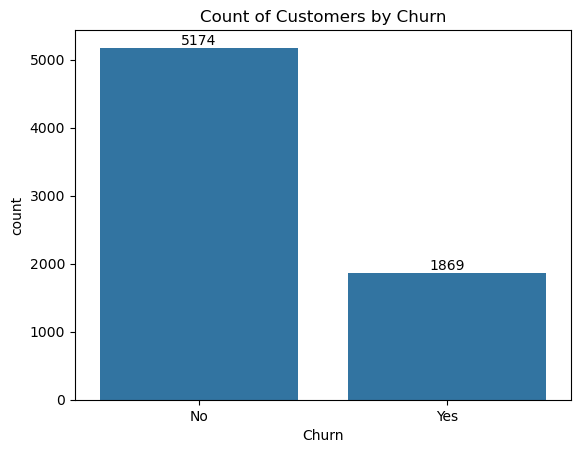

In [57]:
ax = sns.countplot(data = df, x = "Churn")

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

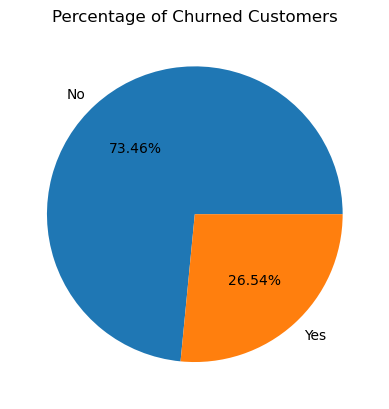

In [152]:
gb = df.groupby("Churn").agg({"Churn" : "count"})

plt.pie(gb["Churn"], labels = gb.index, autopct = "%.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

#From the given pie chart we can conclue that 26.54% of our customers have churned out ,
#Now let's explore the reason behnd it .

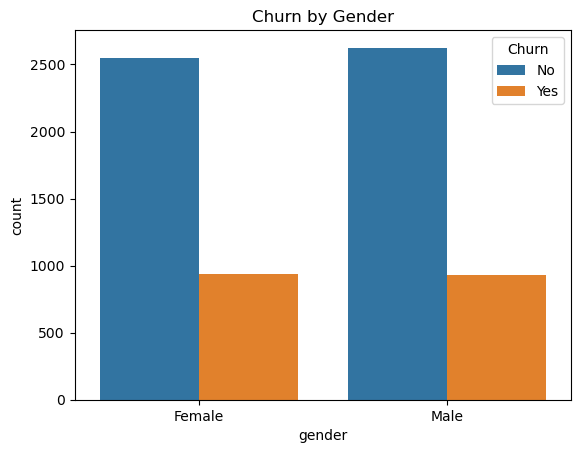

In [164]:
sns.countplot(data = df, x = "gender", hue = "Churn")
plt.title("Churn by Gender")
plt.show()

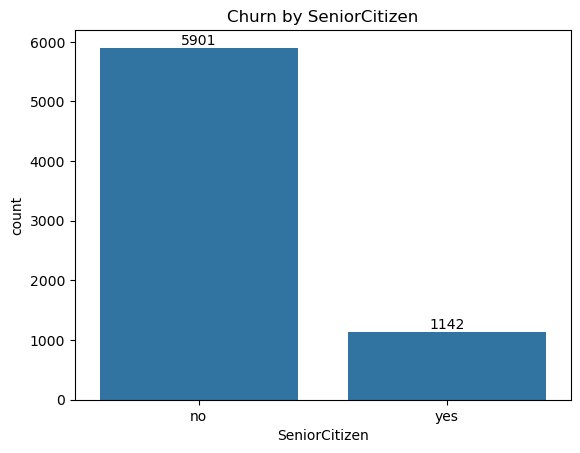

In [176]:
ax =sns.countplot(data = df, x = "SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

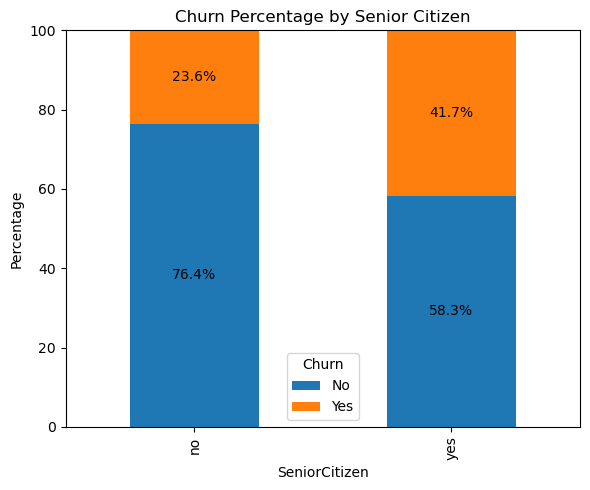

In [187]:
# Sample: if your DataFrame is already loaded as df
# Step 1: Prepare percentage data
crosstab = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize='index') * 100
crosstab = crosstab[["No", "Yes"]]  # Ensure consistent order

# Step 2: Plot stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(6, 5))

# Step 3: Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type = 'center', fontsize=10)

# Step 4: Styling
plt.title("Churn Percentage by Senior Citizen")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned

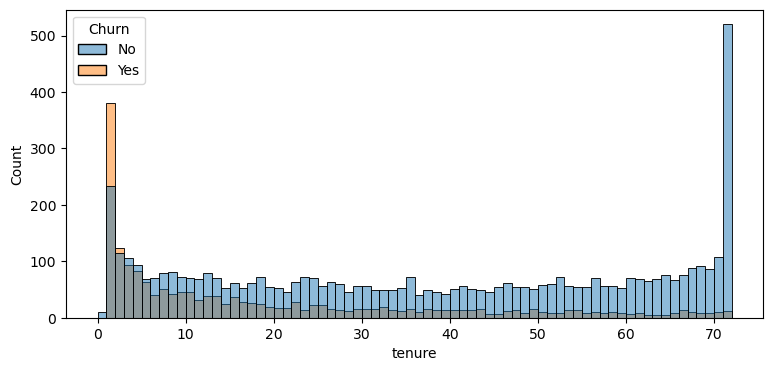

In [201]:
plt.figure(figsize = (9,4))
sns.histplot(data = df, x = "tenure", bins = 72, hue = "Churn")
plt.show()

#People who hvae used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

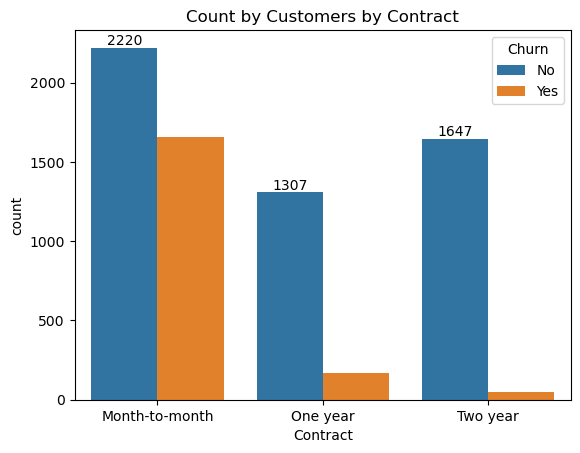

In [212]:
ax = sns.countplot(data = df, x = "Contract", hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count by Customers by Contract")
plt.show()

#People who have month to month contract are likely to chur then from those who have 1 or 2 years of contract

In [222]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

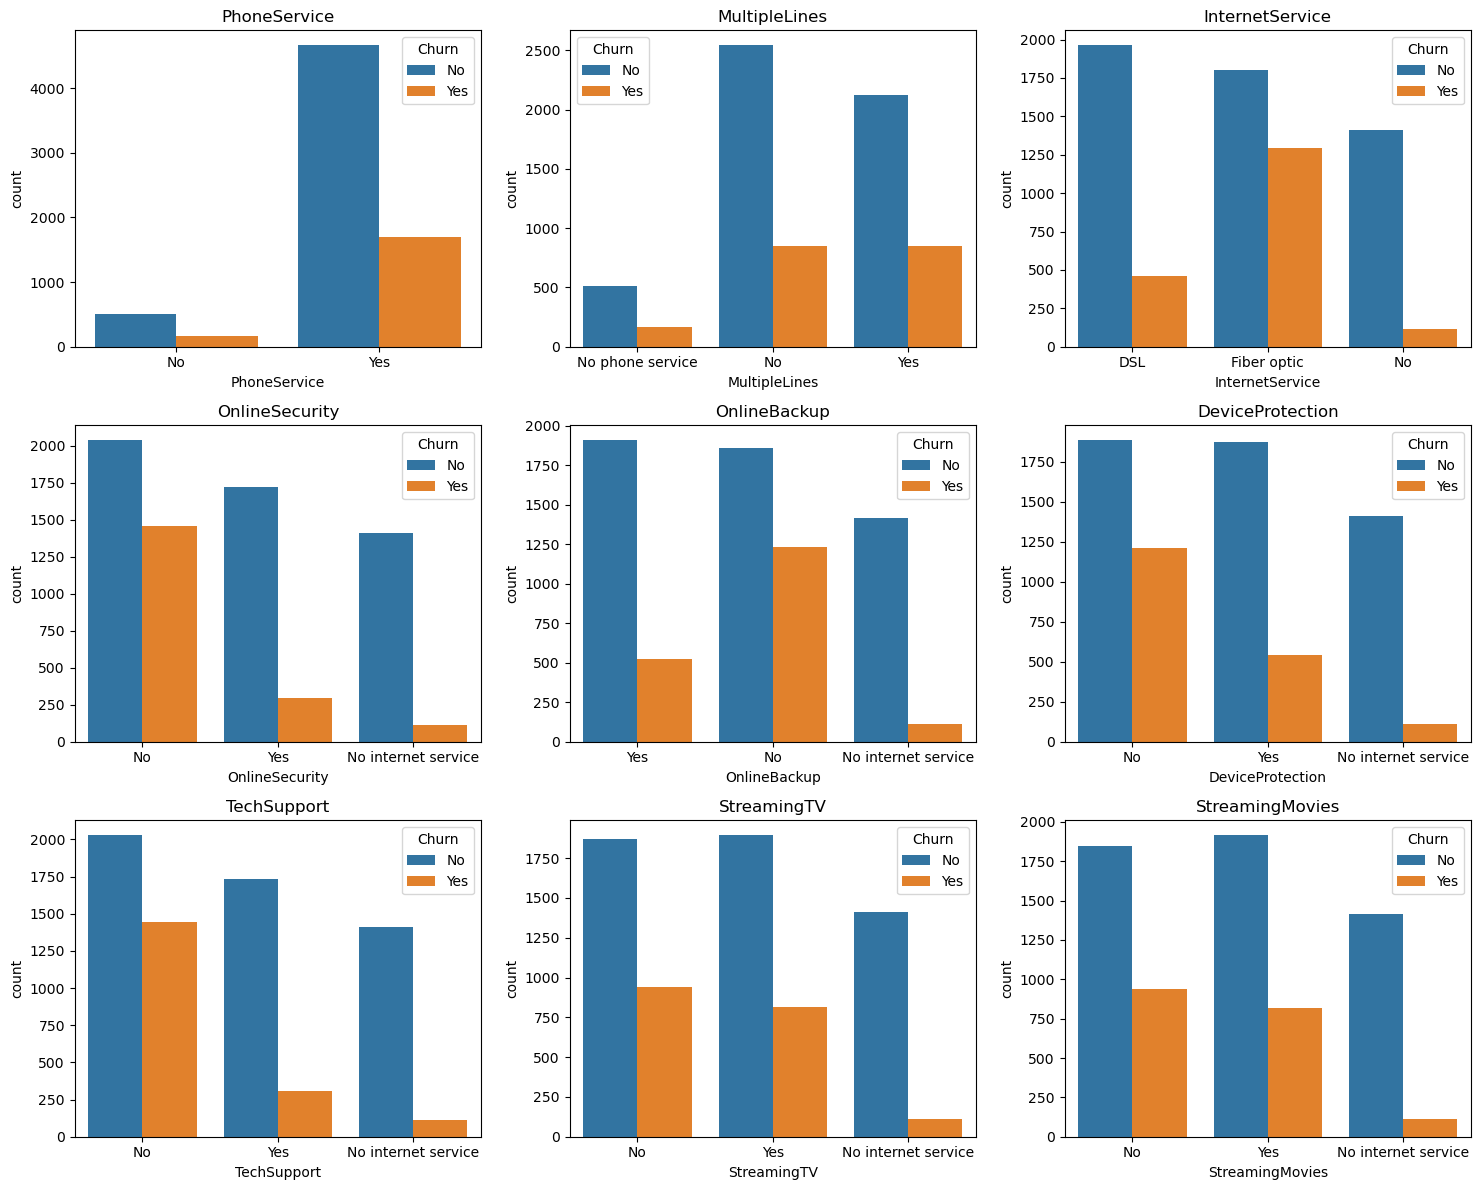

In [246]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(data=df, x=col, hue = "Churn")
    plt.title(col)
    
plt.tight_layout()
plt.show()

#The visualizations show that customers who **lack internet-related services** (like OnlineSecurity, TechSupport, or DeviceProtection) or have **fiber optic InternetService** are **more likely to churn**, while those with **multiple or bundled services** tend to **churn less**.


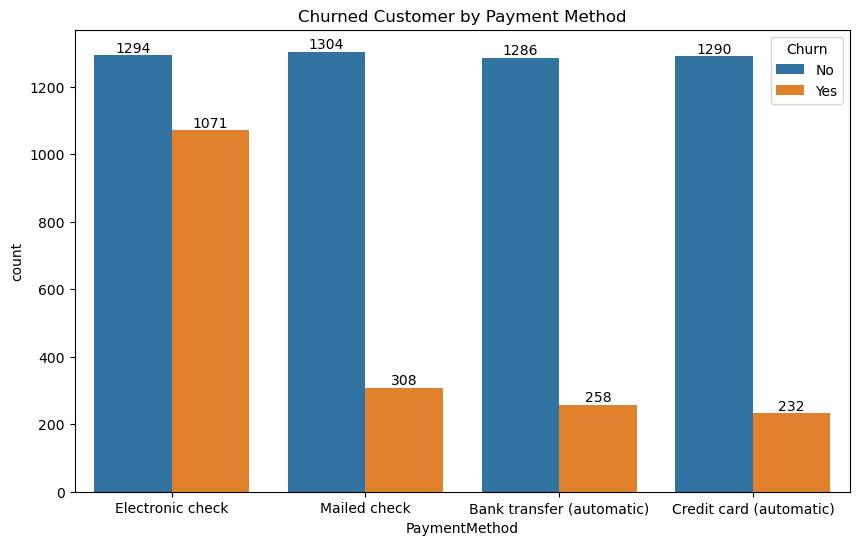

In [274]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = df, x = "PaymentMethod", hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by Payment Method")
plt.show()

#Customer is likely to churn when he is using electronic checks as a payment method